In [1]:
!pip install pandas numpy matplotlib seaborn prophet plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 1.5 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/13.3 MB 1.2 MB/s eta 0:00:11
   --- ------------------------------------ 1.0/13.3 MB 1.3 MB/s eta 0:00:10
   --- ------------------------------------ 1.3/13.3 MB 1.4 MB/s eta 0:00:09
   ----- ---------------------------------- 1.8/13.3 MB 1.5 MB/s eta 0:00:08
   ------ --------------------------------- 2.1/13.3 MB 1.5 MB/s eta 0:00:08
   ------ --------------------------------- 2.1/13.3 MB 1.5 MB/s eta 0:00:08
   ------- -------------------------------- 2.4/13.3 MB 1.3 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/13.3 MB 1.3 MB/s eta 0:00:09
   ------- -------------------------------- 2.6/13.3 MB 1.1 MB/s eta 0:00:10
   -------- 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"Dataset\Walmart.csv")  # Replace with your file path

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930  

In [3]:
# Step 2: Data Cleaning & Preprocessing

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Display the first few rows to confirm the change
print("After converting 'Date' to datetime:")
print(df.head())

# Aggregate sales by date (sum of weekly sales for each date)
daily_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Display the aggregated sales data
print("\nAggregated Daily Sales:")
print(daily_sales.head())

# Check for missing values in the aggregated data
print("\nMissing values in daily_sales:")
print(daily_sales.isnull().sum())

After converting 'Date' to datetime:
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  

Aggregated Daily Sales:
        Date  Weekly_Sales
0 2010-02-05   49750740.50
1 2010-02-12   48336677.63
2 2010-02-19   48276993.78
3 2010-02-26   43968571.13
4 2010-03-05   46871470.30

Missing values in daily_sales:
Date            0
Weekly_Sales    0
dtype: int64


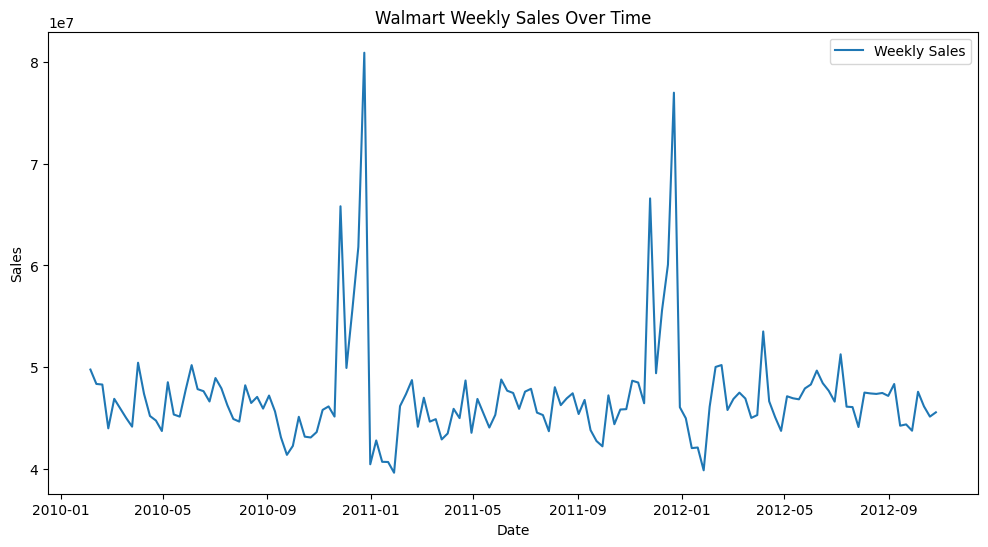

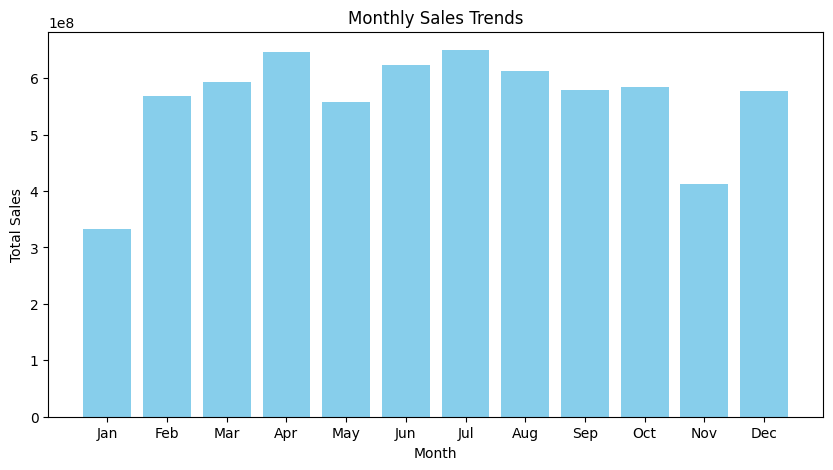

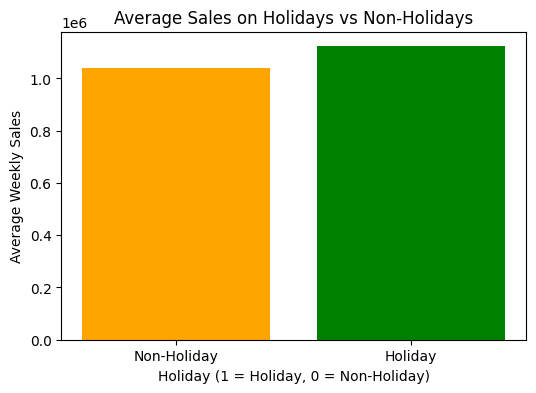

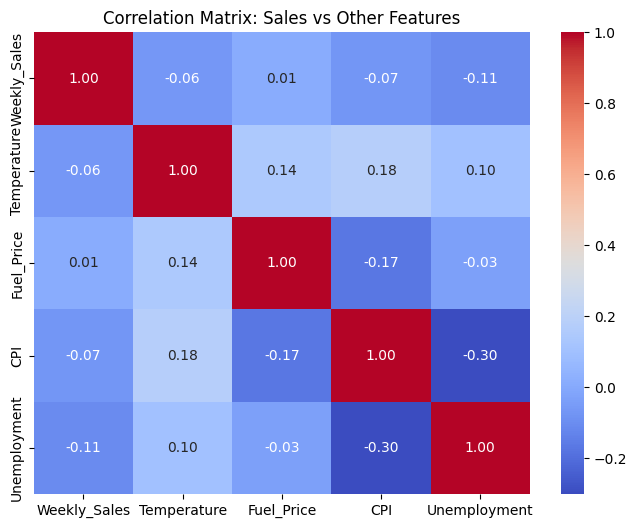

In [4]:
# Step 3: Exploratory Data Analysis (EDA)

# Plot weekly sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Weekly_Sales'], label='Weekly Sales')
plt.title("Walmart Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Analyze monthly sales trends
daily_sales['Month'] = daily_sales['Date'].dt.month
monthly_sales = daily_sales.groupby('Month')['Weekly_Sales'].sum()

plt.figure(figsize=(10, 5))
plt.bar(monthly_sales.index, monthly_sales.values, color='skyblue')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Analyze holiday impact on sales
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

plt.figure(figsize=(6, 4))
plt.bar(holiday_sales.index, holiday_sales.values, color=['orange', 'green'])
plt.title("Average Sales on Holidays vs Non-Holidays")
plt.xlabel("Holiday (1 = Holiday, 0 = Non-Holiday)")
plt.ylabel("Average Weekly Sales")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

# Correlation between sales and other features
correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix: Sales vs Other Features")
plt.show()

00:13:38 - cmdstanpy - INFO - Chain [1] start processing
00:13:40 - cmdstanpy - INFO - Chain [1] done processing


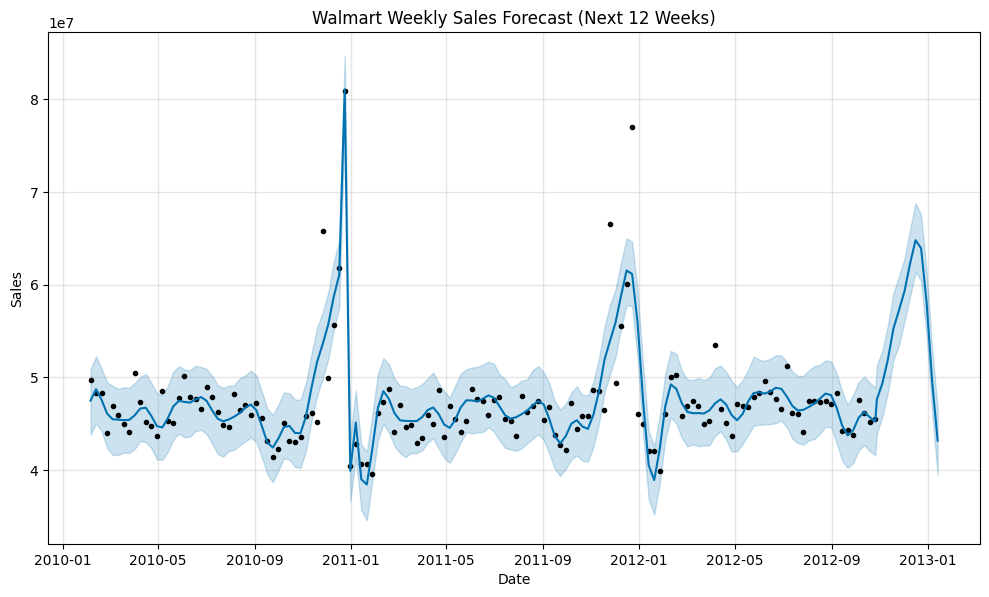

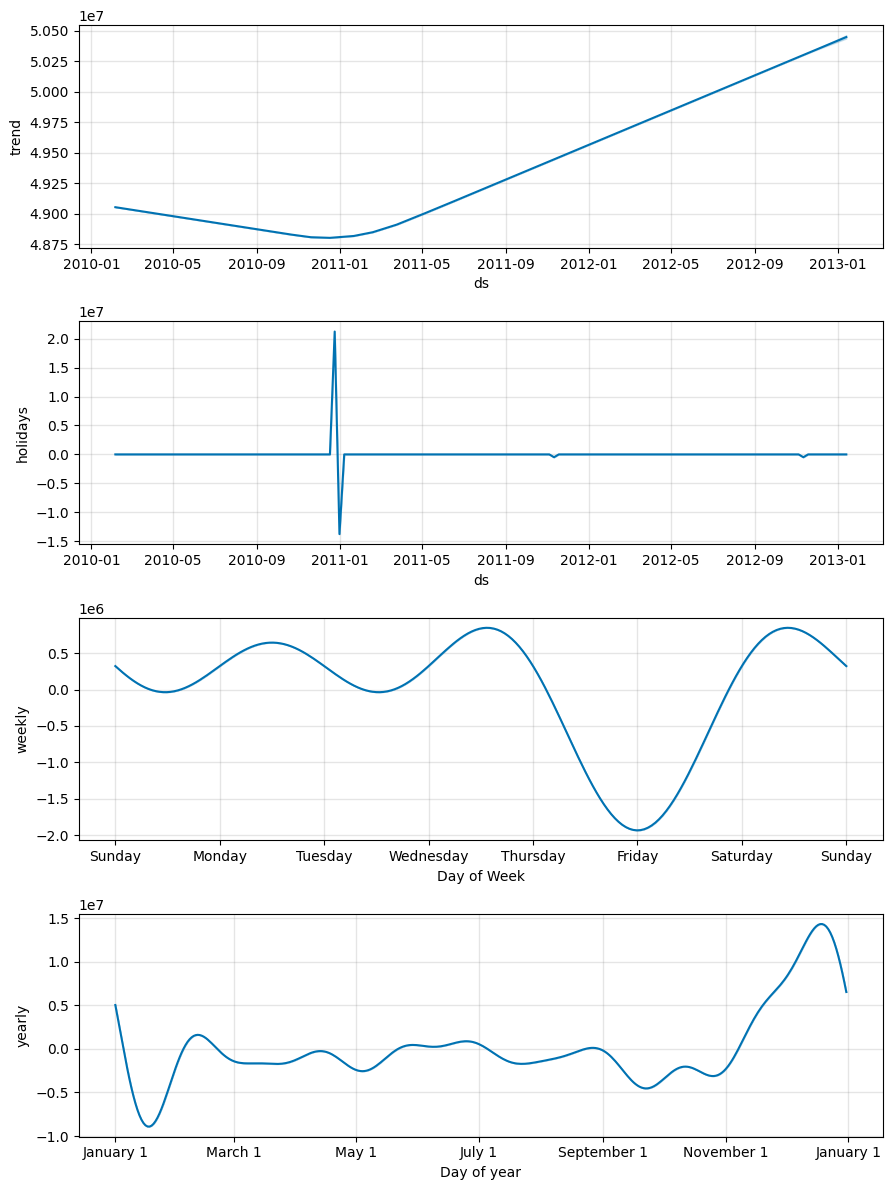

Forecast for the next 12 weeks:
            ds          yhat    yhat_lower    yhat_upper
143 2012-10-28  4.760564e+07  4.394248e+07  5.132489e+07
144 2012-11-04  4.934875e+07  4.575330e+07  5.286211e+07
145 2012-11-11  5.193544e+07  4.835197e+07  5.561979e+07
146 2012-11-18  5.526437e+07  5.189631e+07  5.907459e+07
147 2012-11-25  5.722873e+07  5.345852e+07  6.089051e+07
148 2012-12-02  5.928388e+07  5.603722e+07  6.282030e+07
149 2012-12-09  6.225412e+07  5.867982e+07  6.593454e+07
150 2012-12-16  6.479832e+07  6.137372e+07  6.880769e+07
151 2012-12-23  6.393650e+07  6.040355e+07  6.755954e+07
152 2012-12-30  5.811961e+07  5.445252e+07  6.142870e+07
153 2013-01-06  4.959488e+07  4.618015e+07  5.307905e+07
154 2013-01-13  4.315805e+07  3.944180e+07  4.663832e+07


In [5]:
# Step 4: Demand Forecasting with Prophet

# Import Prophet
from prophet import Prophet

# Prepare data for Prophet (rename columns to 'ds' and 'y')
prophet_df = daily_sales.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Initialize and configure the Prophet model
model = Prophet(
    yearly_seasonality=True,   # Capture yearly trends (e.g., holiday spikes)
    weekly_seasonality=True,   # Capture weekly patterns
    daily_seasonality=False,   # Disable daily (data is weekly)
    holidays_prior_scale=0.5   # Adjust holiday impact strength
)

# Add built-in US holidays to the model (optional)
model.add_country_holidays(country_name='US')

# Fit the model to the data
model.fit(prophet_df)

# Create a future dataframe for forecasting (next 12 weeks)
future = model.make_future_dataframe(periods=12, freq='W')  # Weekly frequency
forecast = model.predict(future)

# Plot the forecast
fig_forecast = model.plot(forecast)
plt.title("Walmart Weekly Sales Forecast (Next 12 Weeks)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Plot forecast components (trend, holidays, seasonality)
fig_components = model.plot_components(forecast)
plt.show()

# Extract key metrics (optional)
print("Forecast for the next 12 weeks:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

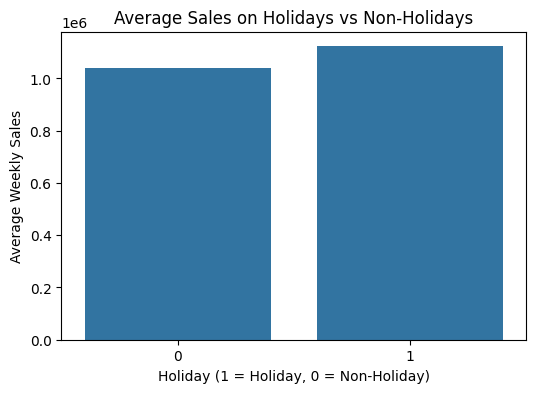

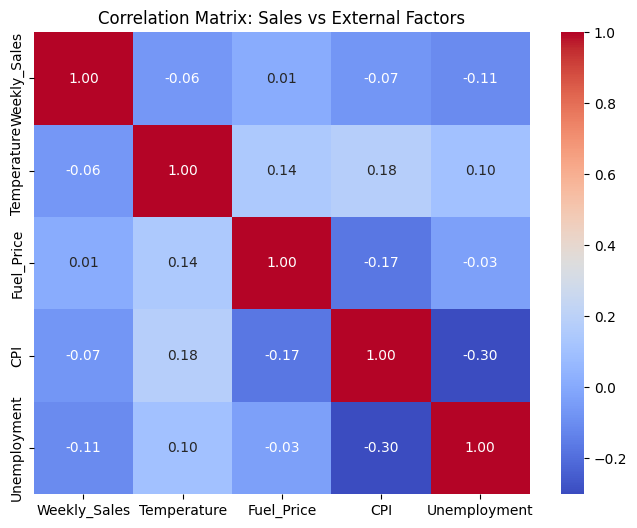

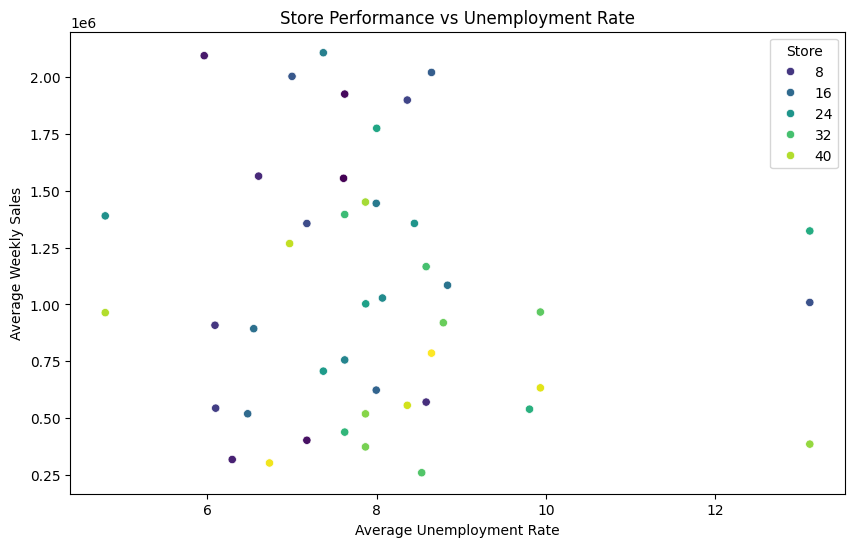

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"Dataset\Walmart.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# 1. Analyze Holiday Impact on Sales
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=holiday_sales)
plt.title("Average Sales on Holidays vs Non-Holidays")
plt.xlabel("Holiday (1 = Holiday, 0 = Non-Holiday)")
plt.ylabel("Average Weekly Sales")
plt.show()

# 2. Correlation Analysis Between Features
correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix: Sales vs External Factors")
plt.show()

# 3. Store Performance Clustering (Advanced)
# Group stores by average weekly sales and unemployment rate
store_performance = df.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'Unemployment': 'mean'
}).reset_index()

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=store_performance, hue='Store', palette='viridis')
plt.title("Store Performance vs Unemployment Rate")
plt.xlabel("Average Unemployment Rate")
plt.ylabel("Average Weekly Sales")
plt.show()

In [7]:
# Step 5: Inventory Optimization

# Calculate average daily sales (from historical data)
avg_daily_sales = daily_sales['Weekly_Sales'].mean() / 7  # Convert weekly to daily

# Calculate standard deviation of daily sales (for safety stock)
std_dev_daily_sales = daily_sales['Weekly_Sales'].std() / 7  # Convert weekly to daily

# Define lead time (in days) - time taken to restock
lead_time = 7  # Assume 7 days for restocking

# Calculate safety stock (Z-score for 95% confidence level)
z_score = 1.65  # For 95% confidence
safety_stock = z_score * std_dev_daily_sales * np.sqrt(lead_time)

# Calculate reorder point
reorder_point = (avg_daily_sales * lead_time) + safety_stock

# Print results
print(f"Average Daily Sales: {avg_daily_sales:.2f}")
print(f"Standard Deviation of Daily Sales: {std_dev_daily_sales:.2f}")
print(f"Lead Time: {lead_time} days")
print(f"Safety Stock: {safety_stock:.2f}")
print(f"Reorder Point: {reorder_point:.2f}")

# Apply reorder point to forecasted demand
forecast['Reorder_Point'] = reorder_point
forecast['Safety_Stock'] = safety_stock

# Display forecast with reorder points
print("\nForecast with Reorder Points:")
print(forecast[['ds', 'yhat', 'Reorder_Point', 'Safety_Stock']].tail(12))

Average Daily Sales: 6730488.50
Standard Deviation of Daily Sales: 777743.74
Lead Time: 7 days
Safety Stock: 3395232.27
Reorder Point: 50508651.76

Forecast with Reorder Points:
            ds          yhat  Reorder_Point  Safety_Stock
143 2012-10-28  4.760564e+07   5.050865e+07  3.395232e+06
144 2012-11-04  4.934875e+07   5.050865e+07  3.395232e+06
145 2012-11-11  5.193544e+07   5.050865e+07  3.395232e+06
146 2012-11-18  5.526437e+07   5.050865e+07  3.395232e+06
147 2012-11-25  5.722873e+07   5.050865e+07  3.395232e+06
148 2012-12-02  5.928388e+07   5.050865e+07  3.395232e+06
149 2012-12-09  6.225412e+07   5.050865e+07  3.395232e+06
150 2012-12-16  6.479832e+07   5.050865e+07  3.395232e+06
151 2012-12-23  6.393650e+07   5.050865e+07  3.395232e+06
152 2012-12-30  5.811961e+07   5.050865e+07  3.395232e+06
153 2013-01-06  4.959488e+07   5.050865e+07  3.395232e+06
154 2013-01-13  4.315805e+07   5.050865e+07  3.395232e+06


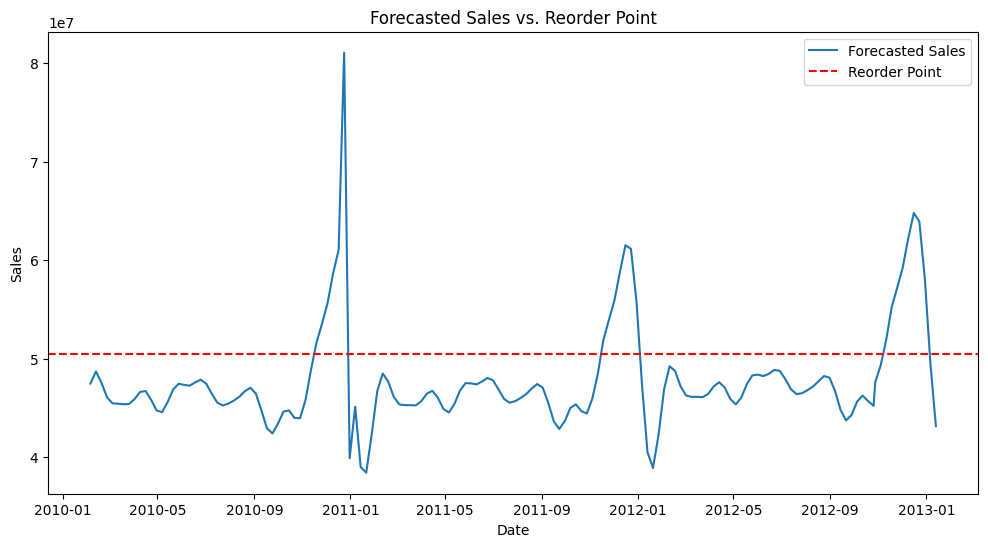

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales')
plt.axhline(y=reorder_point, color='r', linestyle='--', label='Reorder Point')
plt.title("Forecasted Sales vs. Reorder Point")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [9]:
for index, row in forecast.iterrows():
    if row['yhat'] > reorder_point:
        print(f"ALERT: Restock needed by {row['ds']}. Forecasted sales: {row['yhat']:.2f}")

ALERT: Restock needed by 2010-11-19 00:00:00. Forecasted sales: 51661570.03
ALERT: Restock needed by 2010-11-26 00:00:00. Forecasted sales: 53570065.05
ALERT: Restock needed by 2010-12-03 00:00:00. Forecasted sales: 55663124.93
ALERT: Restock needed by 2010-12-10 00:00:00. Forecasted sales: 58660293.52
ALERT: Restock needed by 2010-12-17 00:00:00. Forecasted sales: 61046070.97
ALERT: Restock needed by 2010-12-24 00:00:00. Forecasted sales: 81067375.66
ALERT: Restock needed by 2011-11-18 00:00:00. Forecasted sales: 51896407.96
ALERT: Restock needed by 2011-11-25 00:00:00. Forecasted sales: 53928799.81
ALERT: Restock needed by 2011-12-02 00:00:00. Forecasted sales: 55910658.96
ALERT: Restock needed by 2011-12-09 00:00:00. Forecasted sales: 58801083.01
ALERT: Restock needed by 2011-12-16 00:00:00. Forecasted sales: 61525157.34
ALERT: Restock needed by 2011-12-23 00:00:00. Forecasted sales: 61156803.75
ALERT: Restock needed by 2011-12-30 00:00:00. Forecasted sales: 55834571.33
ALERT: Resto

In [7]:
import pandas as pd
from prophet import Prophet

# Load your Walmart dataset
df = pd.read_csv(r"D:\Predictive Inventory Optimization\Dataset\Walmart.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Aggregate sales by date (sum across all stores)
daily_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Prepare data for Prophet
prophet_df = daily_sales.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Train the model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(prophet_df)

# Generate forecasts (next 12 weeks)
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

# Add reorder point and safety stock (from your earlier results)
forecast['Reorder_Point'] = 50508651.76
forecast['Safety_Stock'] = 3395232.27

# Save to CSV
forecast.to_csv("forecast_data.csv", index=False)

C:\Users\HariHaran\AppData\Roaming\Python\Python311\site-packages\holidays\deprecations\v1_incompatibility.py:40: FutureIncompatibilityWarning: 

This is a future version incompatibility warning from Holidays v0.66
to inform you about an upcoming change in our API versioning strategy that may affect your
project's dependencies. Starting from version 1.0 onwards, we will be following a loose form of
Semantic Versioning (SemVer, https://semver.org) to provide clearer communication regarding any
potential breaking changes.

This means that while we strive to maintain backward compatibility, there might be occasional
updates that introduce breaking changes to our API. To ensure the stability of your projects,
we highly recommend pinning the version of our API that you rely on. You can pin your current
holidays v0.x dependency (e.g., holidays==0.66) or limit it (e.g., holidays<1.0) in order to
avoid potentially unwanted upgrade to the version 1.0 when it's released (ETA 2025Q1-Q2).

If you 

In [9]:
import pandas as pd

# Load the Walmart dataset
df = pd.read_csv(r"Dataset\Walmart.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Simulate "product associations" using store-holiday patterns
store_holiday_sales = df.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].mean().reset_index()
store_holiday_sales['antecedents'] = 'Store ' + store_holiday_sales['Store'].astype(str)
store_holiday_sales['consequents'] = store_holiday_sales['Holiday_Flag'].map({0: 'Non-Holiday', 1: 'Holiday'})

# Calculate metrics (support, confidence, lift)
total_sales = store_holiday_sales['Weekly_Sales'].sum()
store_holiday_sales['support'] = store_holiday_sales['Weekly_Sales'] / total_sales
store_holiday_sales['confidence'] = store_holiday_sales['Weekly_Sales'] / store_holiday_sales.groupby('Store')['Weekly_Sales'].transform('sum')
store_holiday_sales['lift'] = store_holiday_sales['confidence'] / store_holiday_sales['support']

# Save to CSV
store_holiday_sales.to_csv("product_associations.csv", index=False)

In [10]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Load data
forecast = pd.read_csv("forecast_data.csv")
product_associations = pd.read_csv("product_associations.csv")

# Initialize Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1("Walmart Inventory Dashboard", style={'textAlign': 'center'}),
    
    # 1. Forecast vs. Actual Sales Line Chart
    dcc.Graph(
        id='forecast-chart',
        figure=px.line(
            forecast,
            x='ds',
            y='yhat',
            title='Forecasted Sales',
            labels={'ds': 'Date', 'yhat': 'Sales'}
        ).update_layout(
            hovermode="x unified",
            showlegend=False
        )
    ),
    
    # 2. Heatmap for Product Associations
    dcc.Graph(
        id='heatmap',
        figure=px.imshow(
            product_associations.pivot_table(
                index='antecedents',
                columns='consequents',
                values='lift'
            ),
            title='Store-Holiday Associations (Lift)',
            labels={'x': 'Consequents', 'y': 'Antecedents', 'color': 'Lift'}
        )
    ),
    
    # 3. Low-Stock Alerts Table
    html.H3("Low-Stock Alerts", style={'textAlign': 'center'}),
    html.Table(
        id='alerts-table',
        children=[
            html.Thead(html.Tr([html.Th("Date"), html.Th("Forecasted Sales"), html.Th("Reorder Point")])),
            html.Tbody([
                html.Tr([
                    html.Td(row['ds']),
                    html.Td(f"${row['yhat']:,.2f}"),
                    html.Td(f"${row['Reorder_Point']:,.2f}")
                ]) for index, row in forecast.iterrows() if row['yhat'] > row['Reorder_Point']
            ])
        ],
        style={'margin': 'auto', 'width': '80%'}
    ),
    
    # 4. Date Range Filter
    dcc.DatePickerRange(
        id='date-picker',
        start_date=forecast['ds'].min(),
        end_date=forecast['ds'].max(),
        display_format='YYYY-MM-DD'
    )
])

# Add callback for filtering (optional)
@app.callback(
    [dash.dependencies.Output('forecast-chart', 'figure'),
     dash.dependencies.Output('alerts-table', 'children')],
    [dash.dependencies.Input('date-picker', 'start_date'),
     dash.dependencies.Input('date-picker', 'end_date')]
)
def update_dashboard(start_date, end_date):
    filtered_forecast = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
    
    # Update line chart
    fig = px.line(
        filtered_forecast,
        x='ds',
        y='yhat',
        title='Filtered Forecast'
    )
    
    # Update alerts table
    alerts = [
        html.Tr([
            html.Td(row['ds']),
            html.Td(f"${row['yhat']:,.2f}"),
            html.Td(f"${row['Reorder_Point']:,.2f}")
        ]) for index, row in filtered_forecast.iterrows() if row['yhat'] > row['Reorder_Point']
    ]
    
    return fig, alerts

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\HariHaran\AppData\Roaming\Python\Python311\site-packages\dash\_jupyter.py:29: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  _dash_comm = Comm(target_name="dash")
C:\Users\HariHaran\AppData\Roaming\Python\Python311\site-packages\_plotly_utils\basevalidators.py:2596: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

C:\Users\HariHaran\AppData\Roaming\Python\Python311\site-packages\_plotly_utils\basevalidators.py:2596: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

C:\Users\HariHaran\AppData\Roaming\Python\Python311\site-packages\dash\dash.py:2282: DeprecationWarning:

Dash.run_server is deprecated and will be removed in Dash 3.0



C:\Users\HariHaran\AppData\Roaming\Python\Python311\site-packages\_plotly_utils\basevalidators.py:2596: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

C:\Users\HariHaran\AppData\Roaming\Python\Python311\site-packages\_plotly_utils\basevalidators.py:2596: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

C:\Users\HariHaran\AppData\Roaming\Python\Python311\site-packages\_plotly_utils\basevalidators.py:2596: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

